<a href="https://colab.research.google.com/github/mosultan99/mosultan99/blob/main/text_mining_and_sentimental_analysis_of_user_reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#part one text mining
preprocessing steps



In [ ]:
import sys
print(sys.executable)

/usr/bin/python3


In [ ]:
!pip install wordcloud

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
from wordcloud import wordcloud
import nltk
nltk.download(['stopwords',
               'punkt',
               'wordnet',
               'omw-1.4',
               'vader_lexicon'
               ])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
simple_text='This isn\'t a real text, this is an example text...Notice this contains punctuation!!'

In [ ]:
tokenizer = nltk.tokenize.RegexpTokenizer('[a-zA-Z0-9\']+')
tokenized_document = tokenizer.tokenize(simple_text)
print(tokenized_document)

['This', "isn't", 'a', 'real', 'text', 'this', 'is', 'an', 'example', 'text', 'Notice', 'this', 'contains', 'punctuation']


In [ ]:
stop_words = nltk.corpus.stopwords.words('english')
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
#remove stopwords

cleaned_tokens = []

for word in tokenized_document:
  word = word.lower()
  if word not in stop_words:
    cleaned_tokens.append(word)
  print(cleaned_tokens)

[]
[]
[]
['real']
['real', 'text']
['real', 'text']
['real', 'text']
['real', 'text']
['real', 'text', 'example']
['real', 'text', 'example', 'text']
['real', 'text', 'example', 'text', 'notice']
['real', 'text', 'example', 'text', 'notice']
['real', 'text', 'example', 'text', 'notice', 'contains']
['real', 'text', 'example', 'text', 'notice', 'contains', 'punctuation']


In [ ]:
# removing stopwords using list comprehension

cleaned_tokens = [word.lower() for word in tokenized_document if word.lower() not in stop_words]

print(cleaned_tokens)

['real', 'text', 'example', 'text', 'notice', 'contains', 'punctuation']


In [ ]:
# explore lemmatization vs stemming

lemmatizer = nltk.stem.WordNetLemmatizer()
stemmer = nltk.stem.PorterStemmer()

words = ['cacti','sings','hopped','rocks','better','easily']
pos = ['n','v','v','n','a','r']
lemmatized_words = [lemmatizer.lemmatize(words[i], pos=pos[i]) for i in range(6)]
stemmed_words = [stemmer.stem(word) for word in words]

print("lemmatized_words: ", lemmatized_words)
print("stemmed words: ", stemmed_words)

lemmatized_words:  ['cactus', 'sing', 'hop', 'rock', 'good', 'easily']
stemmed words:  ['cacti', 'sing', 'hop', 'rock', 'better', 'easili']


In [ ]:
# now carrying out stemming on the example sentence

stemmed_text = [stemmer.stem(word) for word in cleaned_tokens]

print(stemmed_text)

['real', 'text', 'exampl', 'text', 'notic', 'contain', 'punctuat']


In [ ]:
# creating a function to apply all of the data preprocessing steps which can then be used on a corpus

def preprocess_text(text):
  tokenized_document = nltk.tokenize.RegexpTokenizer('[a-zA-Z0-9\']+').tokenize(text) #tokenize
  cleaned_tokens = [word.lower() for word in tokenized_document if word.lower() not in stop_words] #remove
  stemmed_text = [nltk.stem.PorterStemmer().stem(word) for word in cleaned_tokens] # stemming
  return stemmed_text


In [ ]:
data = pd.read_csv("yelp_labelled.txt",sep="\t",header=None)
data.columns = ["Text", "Target_Label"]
data.head()

,Text,Target_Label
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [ ]:
print("\n ALL Data Labels")
print(data.groupby("Target_Label").count())


 ALL Data Labels
              Text
Target_Label      
0              500
1              500


In [ ]:
print("\n ALL Data Labels")
print(data.groupby("Target_Label").count())


 ALL Data Labels
              Text
Target_Label      
0              500
1              500


In [ ]:
data['Text'] = data['Text'].apply(preprocess_text)

data.head()

,Text,Target_Label
0,"[wow, love, place]",1
1,"[crust, good]",0
2,"[tasti, textur, nasti]",0
3,"[stop, late, may, bank, holiday, rick, steve, ...",1
4,"[select, menu, great, price]",1


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X=vectorizer.fit_transform(data['Text'].map(''.join))
X=pd.DataFrame(X.toarray())
X.head()

,0,1,2,3,4,5,6,7,8,9,...,1037,1038,1039,1040,1041,1042,1043,1044,1045,1046
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split

y = data['Target_Label']

X_train, X_test, y_train, y_test = train_test_split(
   X, y, train_size=0.8,test_size=0.2,random_state=99)

<ipython-input-27-0205a8af48ff>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train, color = 'blue', palette= ['tab:blue', 'tab:orange'])


<Axes: xlabel='Target_Label', ylabel='count'>

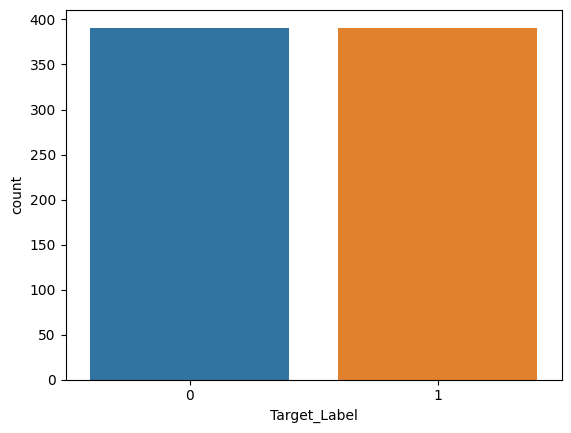

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

resampler = RandomUnderSampler(random_state=0)
X_train, y_train = resampler.fit_resample(X_train, y_train)

sns.countplot(x=y_train, color = 'blue', palette= ['tab:blue', 'tab:orange'])

In [ ]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [ ]:
y_pred = model.predict(X_test)

# computing the accuracy and making the confusion matrix
from sklearn import metrics
acc=metrics.accuracy_score(y_test,y_pred)
print('accuracy:%.2f\n\n'%(acc))
cm = metrics.confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm,'\n\n')
print('......................................................')
result = metrics.classification_report(y_test, y_pred)
print("Classification Report:\n",)
print (result)

accuracy:0.55


Confusion Matrix:
[[  2  89]
 [  1 108]] 


......................................................
Classification Report:

              precision    recall  f1-score   support

           0       0.67      0.02      0.04        91
           1       0.55      0.99      0.71       109

    accuracy                           0.55       200
   macro avg       0.61      0.51      0.37       200
weighted avg       0.60      0.55      0.40       200



#part two Sentiment analysis
# preprocessing steps

In [ ]:
print(preprocess_text('This product is great!'))
print(preprocess_text('This product is not great!'))

['product', 'great']
['product', 'great']


In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sentiment = SentimentIntensityAnalyzer()

print(sentiment.polarity_scores('This product is great!'))
print(sentiment.polarity_scores('This product is not great!'))

{'neg': 0.0, 'neu': 0.406, 'pos': 0.594, 'compound': 0.6588}
{'neg': 0.473, 'neu': 0.527, 'pos': 0.0, 'compound': -0.5553}


In [ ]:
# sentiment analysis of data set

data_set = pd.read_csv('yelp_labelled.txt')

data_set.head()

ParserError: Error tokenizing data. C error: Expected 1 fields in line 14, saw 3


In [ ]:
data_set.describe()

In [ ]:
# extracting the values from the dictionary and create new coloumns within the dataframe

reviews['compound'] = [sentiment.polarity_scores(review)['compound'] for review in data_set['data_set']]
reviews['neg'] = [sentiment.polarity_scores(review)['neg'] for review in data_set['data_set.text']]
reviews['neu'] = [sentiment.polarity_scores(review)['neu'] for review in data_set['data_set.text']]
reviews['pos'] = [sentiment.polarity_scores(review)['pos'] for review in data_set['data_set.text']]